In [5]:
using Plots
using JLD2
using LaTeXStrings

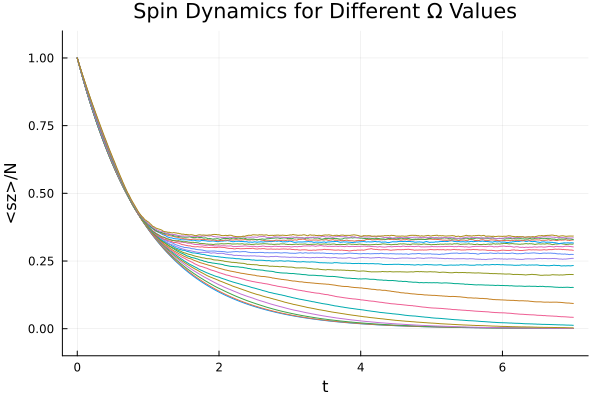

In [524]:
Ω_values = [0.1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
case = 2
Γ = 1
Ω_crit = 4
beta = 0.276
delta = 0.159
plt = plot(
    xlabel = "t", 
    ylabel = "<sz>/N",
    legend = false, 
    title = "Spin Dynamics for Different Ω Values",
    ylim=[-0.1, 1.1]
)

for Ω in Ω_values
    try
        file_name = "sz_mean_steady_for_$(case)D,Ω=$(Ω).jld2"
        
        @load file_name t sz_mean_mean
        
        plot!(plt, t, vec(sz_mean_mean), label = "Ω = $Ω")
    catch e
        println("Could not load or plot for 1D Ω = $Ω: ", e)
    end
end

display(plt)

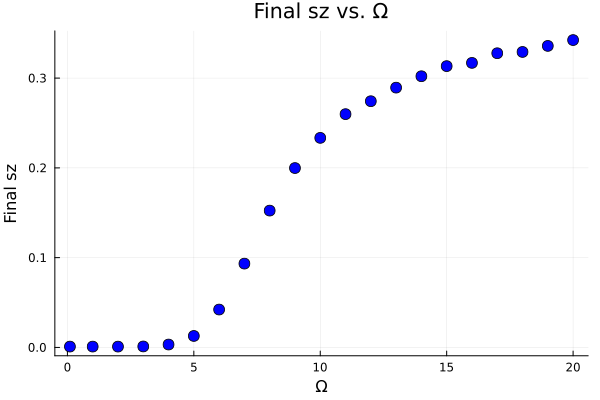

In [530]:
final_sz_values = Float64[]

for Ω in Ω_values
    try
        file_name = "sz_mean_steady_for_$(case)D,Ω=$(Ω).jld2"
        
        @load file_name t sz_mean_mean
        
        push!(final_sz_values, last(sz_mean_mean))
    catch e
        println("Could not load or process for Ω = $Ω: ", e)
        push!(final_sz_values, NaN)  
    end
end

scatter(
    # log.(abs.(Ω_values .- Ω_crit)), log.(abs.(final_sz_values)),
    Ω_values, final_sz_values,
    xlabel = "Ω",
    ylabel = "Final sz",
    title = "Final sz vs. Ω",
    legend = false,
    # xscale=:log10,
    # yscale=:log10,
    marker = :circle,
    markersize = 6,
    color = :blue
)

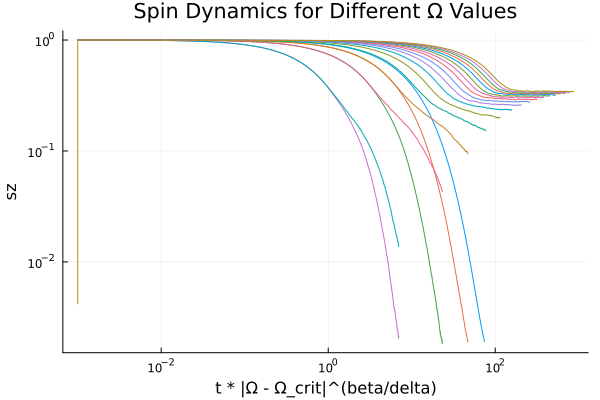

In [526]:
plt = plot(
    xlabel = "t * |Ω - Ω_crit|^(beta/delta)", 
    ylabel = "sz",
    xscale=:log10,
    yscale=:log10,
    legend = false, 
    title = "Spin Dynamics for Different Ω Values"
)

for Ω in Ω_values
    try
        file_name = "sz_mean_steady_for_$(case)D,Ω=$(Ω).jld2"
        
        @load file_name t sz_mean_mean
        
        plot!(plt, t * abs(Ω - Ω_crit)^(beta/delta) .+ 0.001, vec(sz_mean_mean) .+ 0.001, label = "Ω = $Ω")
    catch e
        println("Could not load or plot for Ω = $Ω: ", e)
    end
end

display(plt)

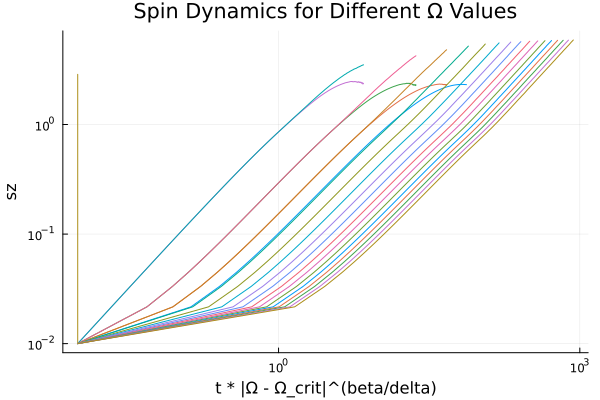

In [527]:
plt = plot(
    xlabel = "t * |Ω - Ω_crit|^(beta/delta)", 
    ylabel = "sz",
    xscale=:log10,
    yscale=:log10,
    legend = false, 
    title = "Spin Dynamics for Different Ω Values"
)

for Ω in Ω_values
    try

        file_name = "sz_mean_steady_for_$(case)D,Ω=$(Ω).jld2"
        
        @load file_name t sz_mean_mean
        

        plot!(plt, t * abs(Ω - Ω_crit)^(beta/delta) .+ 1e-2, vec(sz_mean_mean).^delta .* t .+ 0.01, label = "Ω = $Ω")
    catch e
        println("Could not load or plot for Ω = $Ω: ", e)
    end
end

display(plt)